In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [253]:
#Parameters
trading_window = 15

#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [254]:
dataimport=pd.read_csv('/Users/vedantgupta/Documents/project /summer project(finance)/data-analysis-with-technical-indicators-2/Pair Trading final/data/Indexes/Nifty_50.csv')
datacopy1 = dataimport.copy()
dataimport['Date'] = pd.to_datetime(dataimport['Date'])
curr = dataimport.columns[0]
dataimport.rename(columns={curr: 'Stocks'}, inplace=True)
dataimport.set_index('Stocks', inplace=True)

#data = dataimport.resample('M').first()  #Monthly Resampling



dataimport.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-03,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,303.569244,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
2011-01-04,83.358696,137.957016,435.507385,255.619690,248.287949,1003.359985,63.260792,45.380741,60.294853,301.077179,...,233.050705,224.143417,441.225677,93.640793,243.823334,46.894550,145.471405,170.863922,1036.665527,160.227905
2011-01-05,83.576599,146.361649,430.650635,259.612366,241.463486,964.553528,62.998871,45.046360,58.357433,294.825806,...,229.438522,223.297012,446.698883,92.978455,240.893860,45.966370,142.335739,170.083847,1019.882263,160.558502
2011-01-06,82.596054,143.900589,427.349915,256.818451,240.533295,931.816956,62.208553,44.052860,57.084274,298.373932,...,223.406967,228.764465,451.613007,91.902100,236.800064,46.125011,142.589737,167.194855,961.211853,160.789902
2011-01-07,80.506813,136.749664,432.772583,250.171555,235.891541,923.922119,59.580208,43.214451,56.918213,285.955750,...,221.579605,225.721909,440.416199,89.666672,223.504745,44.636559,138.262314,159.387207,939.246277,157.682205


In [255]:

monthly = dataimport.pct_change()
monthly=monthly.dropna()
monthly.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.002466,0.024130,-0.008162,-0.013341,-0.014404,-0.031629,-0.006172,-0.004677,-0.009697,-0.008209,...,-0.030651,0.005336,-0.011485,0.014350,-0.007681,-0.013280,0.046301,-0.007839,0.002299,0.003312
2011-01-05,0.002614,0.060922,-0.011152,0.015620,-0.027486,-0.038677,-0.004140,-0.007368,-0.032132,-0.020763,...,-0.015500,-0.003776,0.012405,-0.007073,-0.012015,-0.019793,-0.021555,-0.004565,-0.016190,0.002063
2011-01-06,-0.011732,-0.016815,-0.007664,-0.010762,-0.003852,-0.033940,-0.012545,-0.022055,-0.021817,0.012035,...,-0.026288,0.024485,0.011001,-0.011576,-0.016994,0.003451,0.001784,-0.016986,-0.057527,0.001441
2011-01-07,-0.025295,-0.049694,0.012689,-0.025882,-0.019298,-0.008473,-0.042251,-0.019032,-0.002909,-0.041620,...,-0.008180,-0.013300,-0.024793,-0.024324,-0.056146,-0.032270,-0.030349,-0.046698,-0.022852,-0.019328
2011-01-10,-0.069336,-0.046520,0.032142,-0.035306,-0.020341,-0.041660,-0.024028,-0.017046,-0.018802,0.001773,...,-0.020704,-0.033141,-0.010283,-0.037396,-0.011343,-0.015955,-0.020983,-0.035255,0.007795,-0.025894


In [256]:
data = dataimport.transpose()
#data.head()

In [257]:
train_data = monthly.iloc[:260]  

for i in train_data.columns:
    train_data[i] = (1 + train_data[i]).cumprod() - 1

train_data=train_data.transpose()
train_data

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_59440/3013434293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[i] = (1 + train_data[i]).cumprod() - 1


Stocks,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-17,...,2012-01-09,2012-01-10,2012-01-11,2012-01-12,2012-01-13,2012-01-16,2012-01-17,2012-01-18,2012-01-19,2012-01-20
ADANIENT.NS,0.002466,0.005087,-0.006705,-0.031830,-0.098960,-0.069596,-0.045010,-0.007939,-0.010559,-0.060732,...,-0.583156,-0.558951,-0.511243,-0.500114,-0.497390,-0.447425,-0.420341,-0.377613,-0.314340,-0.368352
ADANIPORTS.NS,0.024130,0.086522,0.068252,0.015167,-0.032058,-0.041365,-0.036539,-0.025164,-0.040331,-0.054808,...,-0.082534,-0.053039,-0.048875,-0.079411,-0.087045,-0.087045,-0.028402,-0.016604,0.036834,0.078474
APOLLOHOSP.NS,-0.008162,-0.019223,-0.026740,-0.014390,0.017289,0.007947,0.012564,0.002148,0.010953,0.002685,...,0.255558,0.275145,0.317242,0.343540,0.356850,0.374274,0.385420,0.381633,0.347111,0.300144
ASIANPAINT.NS,-0.013341,0.002070,-0.008714,-0.034371,-0.068463,-0.059557,-0.051573,-0.055939,-0.051712,-0.073646,...,-0.059352,-0.066102,-0.043691,-0.038066,-0.025498,-0.033759,-0.038312,-0.042460,-0.039261,-0.039419
AXISBANK.NS,-0.014404,-0.041494,-0.045187,-0.063613,-0.082660,-0.049318,-0.039703,-0.074727,-0.121413,-0.101378,...,-0.365362,-0.338333,-0.309567,-0.304501,-0.305092,-0.308383,-0.288417,-0.309862,-0.293741,-0.253808
BAJAJ-AUTO.NS,-0.031629,-0.069082,-0.100677,-0.108297,-0.145445,-0.115679,-0.128378,-0.128649,-0.155570,-0.140941,...,-0.008754,-0.003771,0.015324,0.028356,-0.002900,-0.007918,0.012258,0.013826,0.022886,0.088116
BAJFINANCE.NS,-0.006172,-0.010287,-0.022703,-0.063994,-0.086485,-0.098049,-0.086059,-0.091735,-0.101809,-0.100319,...,-0.119838,-0.095022,-0.060179,-0.062848,-0.066383,-0.062344,-0.062127,-0.022884,-0.017401,-0.011991
BAJAJFINSV.NS,-0.004677,-0.012011,-0.033801,-0.052190,-0.068346,-0.080782,-0.080038,-0.080038,-0.098852,-0.121067,...,-0.085486,-0.069504,-0.065561,-0.028695,-0.033490,-0.031146,-0.002910,-0.000886,0.001458,-0.033490
BPCL.NS,-0.009697,-0.041518,-0.062429,-0.065156,-0.082734,-0.075991,-0.062202,-0.094022,-0.100159,-0.112660,...,-0.274381,-0.253264,-0.214899,-0.207241,-0.213120,-0.218302,-0.187285,-0.171119,-0.161218,-0.133836
BHARTIARTL.NS,-0.008209,-0.028802,-0.017114,-0.058021,-0.056352,-0.058160,-0.028524,-0.035341,-0.043412,-0.030193,...,-0.105992,-0.078373,-0.091485,-0.089254,-0.066516,-0.051451,-0.037362,-0.036246,-0.049358,-0.044895


In [258]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(train_data)
labels = ap.predict(train_data)

In [259]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(train_data.index[j])
    groups.append(arr)


for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['HINDALCO.NS', 'JSWSTEEL.NS', 'TATASTEEL.NS']
Group 2 : ['ADANIENT.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'LT.NS', 'MARUTI.NS', 'RELIANCE.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'TATAMOTORS.NS']
Group 3 : ['APOLLOHOSP.NS', 'BAJAJFINSV.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'EICHERMOT.NS', 'HINDUNILVR.NS', 'ITC.NS', 'NESTLEIND.NS', 'TITAN.NS']
Group 4 : ['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BHARTIARTL.NS', 'GRASIM.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'ULTRACEMCO.NS']
Group 5 : ['BAJFINANCE.NS', 'BPCL.NS', 'CIPLA.NS', 'DRREDDY.NS', 'HCLTECH.NS', 'M&M.NS', 'NTPC.NS', 'ONGC.NS', 'TATACONSUM.NS', 'TECHM.NS', 'WIPRO.NS']


# Indicators

In [260]:

datacopy1['Date'] = pd.to_datetime(datacopy1['Date'])
datacopy1.set_index('Date', inplace=True)
data = datacopy1

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-03,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-01-04,83.358696,137.957016,435.507385,255.619690,248.287949,1003.359985,63.260792,45.380741,60.294853,...,233.050705,224.143417,441.225677,93.640793,243.823334,46.894550,145.471405,170.863922,1036.665527,160.227905
2,2011-01-05,83.576599,146.361649,430.650635,259.612366,241.463486,964.553528,62.998871,45.046360,58.357433,...,229.438522,223.297012,446.698883,92.978455,240.893860,45.966370,142.335739,170.083847,1019.882263,160.558502
3,2011-01-06,82.596054,143.900589,427.349915,256.818451,240.533295,931.816956,62.208553,44.052860,57.084274,...,223.406967,228.764465,451.613007,91.902100,236.800064,46.125011,142.589737,167.194855,961.211853,160.789902
4,2011-01-07,80.506813,136.749664,432.772583,250.171555,235.891541,923.922119,59.580208,43.214451,56.918213,...,221.579605,225.721909,440.416199,89.666672,223.504745,44.636559,138.262314,159.387207,939.246277,157.682205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,2022-12-26,3714.894043,800.667358,4664.918945,3030.543213,927.753296,3446.755371,6406.478027,1534.191528,307.009796,...,576.057678,983.492615,3111.288574,761.544739,383.604401,101.681297,965.031006,2473.087646,7041.815918,378.757324
2955,2022-12-27,3767.767578,811.693237,4624.833008,3086.621094,931.249695,3484.354980,6477.177246,1536.890015,307.859711,...,580.688599,983.591064,3117.601318,764.049500,392.925354,107.636917,973.273804,2495.465088,7074.865234,384.829407
2956,2022-12-28,3795.803467,804.938599,4569.908691,3097.628418,923.757385,3480.376953,6448.698242,1521.897949,306.065430,...,579.868530,978.526245,3115.305908,766.308716,390.084229,106.523270,979.733032,2571.817383,7021.707520,386.023895
2957,2022-12-29,3808.697266,814.077209,4505.970703,3089.149658,933.597290,3462.862793,6483.351074,1510.903687,308.992950,...,590.239685,983.984436,3126.448486,762.330566,384.700989,108.217957,976.792603,2545.004395,6950.433594,388.960388


In [261]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [262]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,2022-12-26,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2941,2022-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2942,2022-12-28,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2943,2022-12-29,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1


In [263]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [264]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,50.464134,42.548163,60.388117,27.809632,44.667616,38.917275,28.740460,29.781734,30.865296,...,42.598853,50.574782,65.291971,39.558000,34.726813,23.053031,42.965012,46.456953,41.843280,34.667113
1,2011-01-24,50.281884,48.264506,78.495844,23.610726,53.277395,37.950380,37.546011,28.752792,38.823405,...,52.931649,50.044359,64.341232,42.813995,35.057707,40.713885,46.381510,51.885867,39.956818,29.018157
2,2011-01-25,43.605094,43.876511,63.702442,21.848926,47.415800,35.854319,30.589172,30.308570,54.952767,...,51.202314,41.427199,56.830146,42.608043,30.880447,44.928813,44.547700,54.202835,42.352690,31.989488
3,2011-01-27,40.738504,40.134098,60.100212,21.908541,47.794956,34.557838,28.015269,26.312249,57.296232,...,48.749863,34.363114,59.967143,43.486444,41.012423,42.151256,36.748035,51.243471,36.938164,29.231777
4,2011-01-28,30.773028,43.629190,54.186547,20.176278,39.773987,30.824893,23.631982,25.885412,55.017968,...,45.545366,28.885458,54.027875,25.285880,33.050769,36.324182,29.813610,43.509477,35.097962,28.782867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,2022-12-26,39.656032,34.114945,52.189411,39.118294,57.054523,40.317384,35.298299,36.812619,43.703770,...,48.241055,47.127288,45.137239,38.619894,30.091788,42.280922,37.780675,34.292891,53.296338,34.015453
2941,2022-12-27,42.981091,37.745675,49.346467,48.764349,58.269490,45.634065,40.657541,37.410703,44.748506,...,50.694801,47.180419,46.011136,40.380529,38.200869,54.786189,40.921609,39.538885,54.767674,42.337870
2942,2022-12-28,44.720456,36.421520,45.675140,50.424712,54.698399,45.175537,39.247303,35.405631,42.936925,...,50.240581,44.692276,45.725921,41.996639,36.799663,52.495828,43.335594,53.252946,51.933683,43.838504
2943,2022-12-29,45.543219,39.513202,41.778430,49.104667,58.311926,43.121194,41.888566,33.967854,46.726452,...,55.652306,47.882121,47.429494,39.943416,34.237159,55.541703,42.484551,49.045693,48.323094,47.458580


In [265]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,81.538620,130.016678,450.455017,240.054657,237.070389,921.606445,56.843491,41.164463,54.514904,...,221.234573,222.061661,467.011200,87.472610,222.978928,42.496700,134.892212,163.782654,973.716125,150.739532
1,2011-01-24,81.487343,132.106247,484.641113,236.219772,244.198822,917.431091,57.945408,40.970615,55.465157,...,229.596161,221.787140,466.066864,87.969368,223.147934,43.826523,135.917892,166.711365,967.772949,146.755707
2,2011-01-25,79.468582,130.155991,468.514679,234.318024,238.939987,908.308167,56.062214,41.086922,58.209824,...,228.139374,216.731445,458.107758,87.927979,218.960266,44.238293,135.263382,168.068314,972.860352,147.747543
3,2011-01-27,78.475227,128.298584,463.752258,234.336090,239.262344,902.554016,55.195133,40.335747,58.740299,...,226.056442,211.126770,463.068695,88.052162,224.565750,43.883900,132.000778,166.557220,955.506470,145.671936
4,2011-01-28,73.931427,129.552322,455.217468,232.447922,230.890564,884.659424,53.420330,40.248516,58.348206,...,223.215286,205.339005,456.099854,82.629097,216.011993,43.029980,127.976158,161.988968,948.897766,145.323242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,2022-12-26,3714.894043,800.667358,4664.918945,3030.543213,927.753296,3446.755371,6406.478027,1534.191528,307.009796,...,576.057678,983.492615,3111.288574,761.544739,383.604401,101.681297,965.031006,2473.087646,7041.815918,378.757324
2941,2022-12-27,3767.767578,811.693237,4624.833008,3086.621094,931.249695,3484.354980,6477.177246,1536.890015,307.859711,...,580.688599,983.591064,3117.601318,764.049500,392.925354,107.636917,973.273804,2495.465088,7074.865234,384.829407
2942,2022-12-28,3795.803467,804.938599,4569.908691,3097.628418,923.757385,3480.376953,6448.698242,1521.897949,306.065430,...,579.868530,978.526245,3115.305908,766.308716,390.084229,106.523270,979.733032,2571.817383,7021.707520,386.023895
2943,2022-12-29,3808.697266,814.077209,4505.970703,3089.149658,933.597290,3462.862793,6483.351074,1510.903687,308.992950,...,590.239685,983.984436,3126.448486,762.330566,384.700989,108.217957,976.792603,2545.004395,6950.433594,388.960388


#  strat1 RSI+MACD fixed exit strat

In [266]:
def get_returns(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            n = 0
            temp = 0

        i += 1

    return returns,num_trades

In [267]:
returns,num_trades = get_returns(groups,master_macd,master_rsi,prices,trading_window)

In [268]:
tradesheet1 = pd.DataFrame()
tradesheet1['Returns'] = returns
tradesheet1['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet1.insert(0,f'Window (period = {trading_window})',windows)
tradesheet1

,Window (period = 15),Returns,Number of Trades
0,1,-28.676576,6
1,2,0.854306,1
2,3,-9.339338,7
3,4,-1.013171,5
4,5,3.433777,5
...,...,...,...
191,192,339.177792,8
192,193,74.728261,2
193,194,689.658259,9
194,195,-645.995011,12


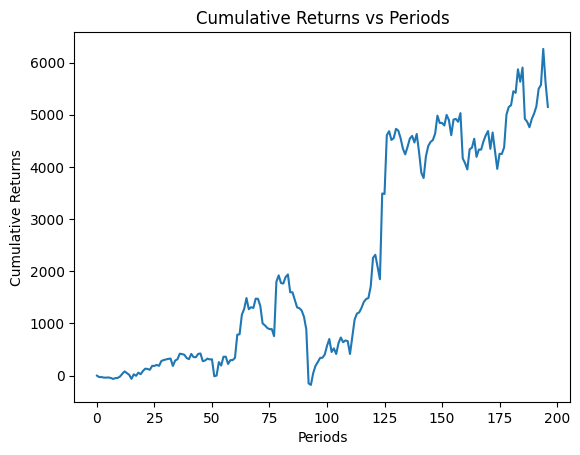

In [269]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


# Strat-2 with variable exit in window + fixed exit at the end

In [270]:
def get_returns_2(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades

In [271]:
returns,num_trades = get_returns_2(groups,master_macd,master_rsi,prices,trading_window)

In [272]:
tradesheet2 = pd.DataFrame()
tradesheet2['Returns'] = returns
tradesheet2['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet2.insert(0,f'Window (period = {trading_window})',windows)
tradesheet2

,Window (period = 15),Returns,Number of Trades
0,1,-29.924334,6
1,2,0.854306,1
2,3,-9.713613,7
3,4,4.259194,5
4,5,-26.349118,5
...,...,...,...
191,192,158.888764,8
192,193,74.728261,2
193,194,661.902089,9
194,195,-372.479130,12


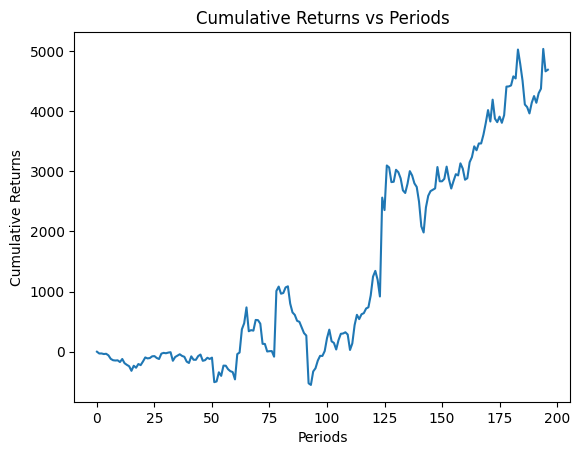

In [273]:

cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


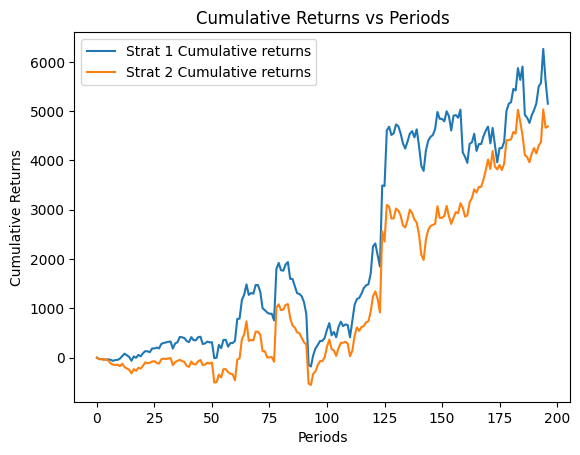

In [274]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()

# strat 3 RSI Fixed exit

In [275]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [276]:
returns,num_trades = get_returns(groups,master_rsi,prices,trading_window)

In [277]:
tradesheet3 = pd.DataFrame()
tradesheet3['Returns'] = returns
tradesheet3['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet3.insert(0,f'Window (period = {trading_window})',windows)
tradesheet3

,Window (period = 15),Returns,Number of Trades
0,1,18.863444,3
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,0.000000,0
...,...,...,...
191,192,84.382493,3
192,193,0.000000,0
193,194,0.000000,0
194,195,0.000000,0


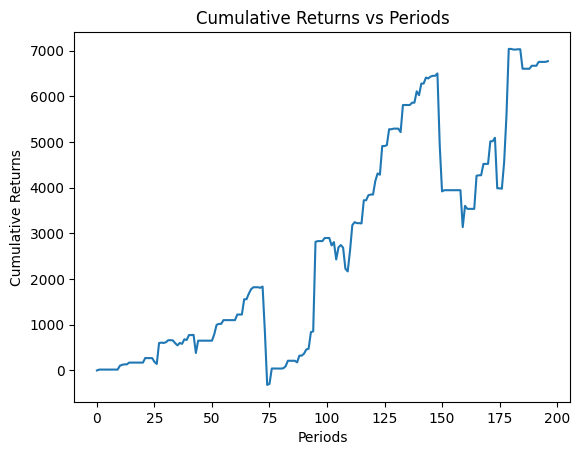

In [278]:
cumulative_returns_3 = []
cumulative_returns_3.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_3.append(s)


plt.plot(windows,cumulative_returns_3)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# strat 4 RSI variable exit

In [279]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [280]:
tradesheet4 = pd.DataFrame()
tradesheet4['Returns'] = returns
tradesheet4['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet4.insert(0,f'Window (period = {trading_window})',windows)
tradesheet4

,Window (period = 15),Returns,Number of Trades
0,1,18.863444,3
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,0.000000,0
...,...,...,...
191,192,84.382493,3
192,193,0.000000,0
193,194,0.000000,0
194,195,0.000000,0


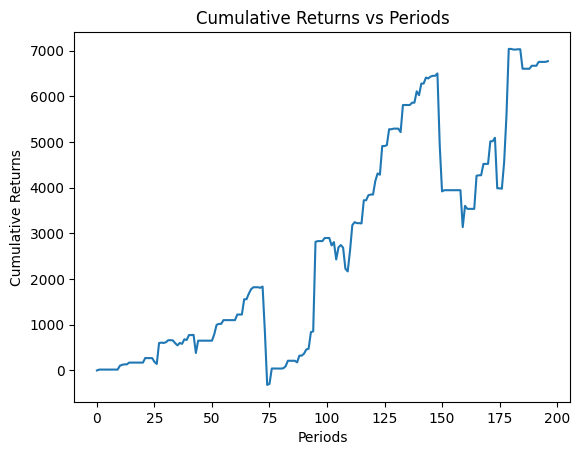

In [281]:
cumulative_returns_4 = []
cumulative_returns_4.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_4.append(s)


plt.plot(windows,cumulative_returns_4)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

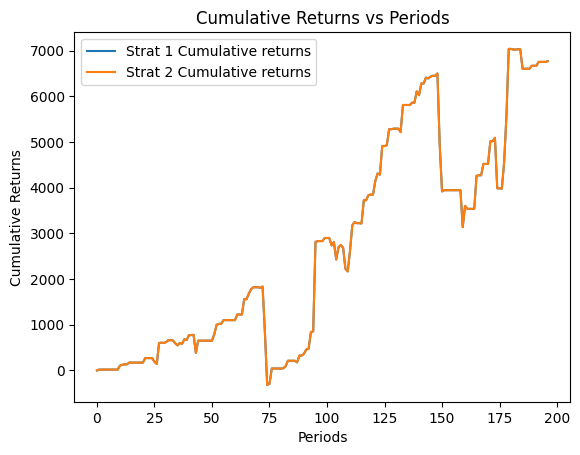

In [282]:
plt.plot(windows,cumulative_returns_3,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_4,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()
